In [1]:
from src.acid import *
from src.utils import *
import matplotlib
import matplotlib.pyplot as plt


Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


In [2]:
image_directory='./images/67p.IMG'
models_directory = './models/*'


image_crop = Read_Preprocess_Image(image_directory,NORMALIZE=1, CONV_GS=1,INVERSE=0,EQUALIZE=0, CLAHE=1,\
                              RESIZE=1 , LIMITS=[1535,1791,0,256])

Objects_Master_list = model_inference(image_crop,models_directory,which_models='all')


--------------------------------------------------        
                                                  
       db         ,ad8888ba,   88  88888888ba,    
      d88b       d8a.    `a8b  88  88      `a8b   
     d8.`8b     d8.            88  88        `8b  
    d8.  `8b    88             88  88         88  
   d8YaaaaY8b   88             88  88         88  
  d8aaaaaaaa8b  Y8,            88  88         8P  
 d8.        `8b  Y8a.    .a8P  88  88      .a8P   
d8.          `8b  `aY8888Ya.   88  88888888Ya.    

--------------------------------------------------                                                         
                    
Loading weights from  /mnt/d/other_data/model_01.h5
Loading weights from  /mnt/d/other_data/model_02.h5
Loading weights from  /mnt/d/other_data/model_03.h5
Loading weights from  /mnt/d/other_data/model_04.h5
Loading weights from  /mnt/d/other_data/model_05.h5
Loading weights from  /mnt/d/other_data/model_06.h5
Loading weights from  /mnt/d/other_data/

/mnt/c/Users/mad/Desktop/acid/src/acid.py:228: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(Craters_Master_list)


In [3]:
objects_unique = get_unique_iou(Objects_Master_list,iou_thres=0.5,detection_thres=0.20)

objects_unique_readable = readable_output(objects_unique)

objects_unique_readable__ = objects_unique_readable[(objects_unique_readable['detection_thres'] > 0.) &\
                                                    (objects_unique_readable['ellipticity'] < 3.0) & \
                                                    (objects_unique_readable['object_size_pixels'] < 0.01*(512**2))]

totalmask = np.sum(objects_unique_readable__['mask'])
totalmask[totalmask>0] = 1




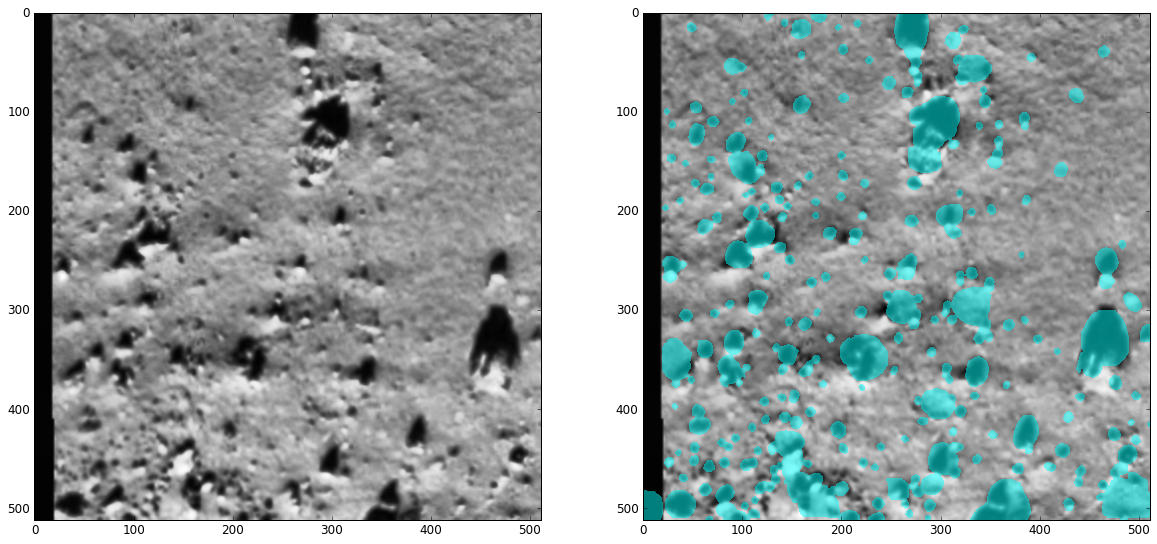

In [4]:

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 40.)
plt.style.use('classic')
matplotlib.style='classic'
plt.subplot(1,2,1)
plt.imshow(image_crop ,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(image_crop ,cmap='gray')
totalmaskMasked = np.ma.masked_where(totalmask == 0, totalmask)

plt.imshow(totalmaskMasked,alpha=0.5,cmap='cool')
plt.show()        